### Dataset

In [1]:
!pip install ucimlrepo

#### the libraries

In [169]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score
import warnings

### 2.2 Dimensionality Reduction - PCA (Principal Component Analysis)


In [ ]:
# I tried the n_compnents my self unitll I found the variance >= 80% at 12
pca = PCA(n_components=12)
d_pca = pca.fit_transform(in_scaled)

d_pca_df = pd.DataFrame(
    d_pca,
    columns=[f'PC{i+1}' for i in range(12)],
    index=in_encoded.index
)
print("Shape of d_pca:", d_pca_df.shape)

explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by 2 components: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance):.2f}")

Shape of d_pca: (303, 12)
Explained variance by 2 components: [0.15835668 0.08468399 0.0794662  0.07149997 0.06602022 0.06209598
 0.0574518  0.05515077 0.05084424 0.04240728 0.04111947 0.03852477]
Total explained variance: 0.81


### Visuals Scatter PCA and plot of the accumulative

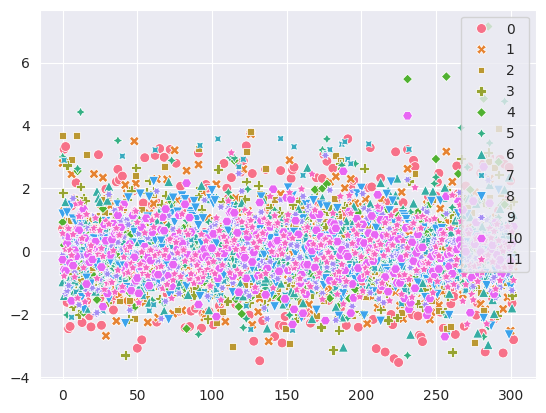

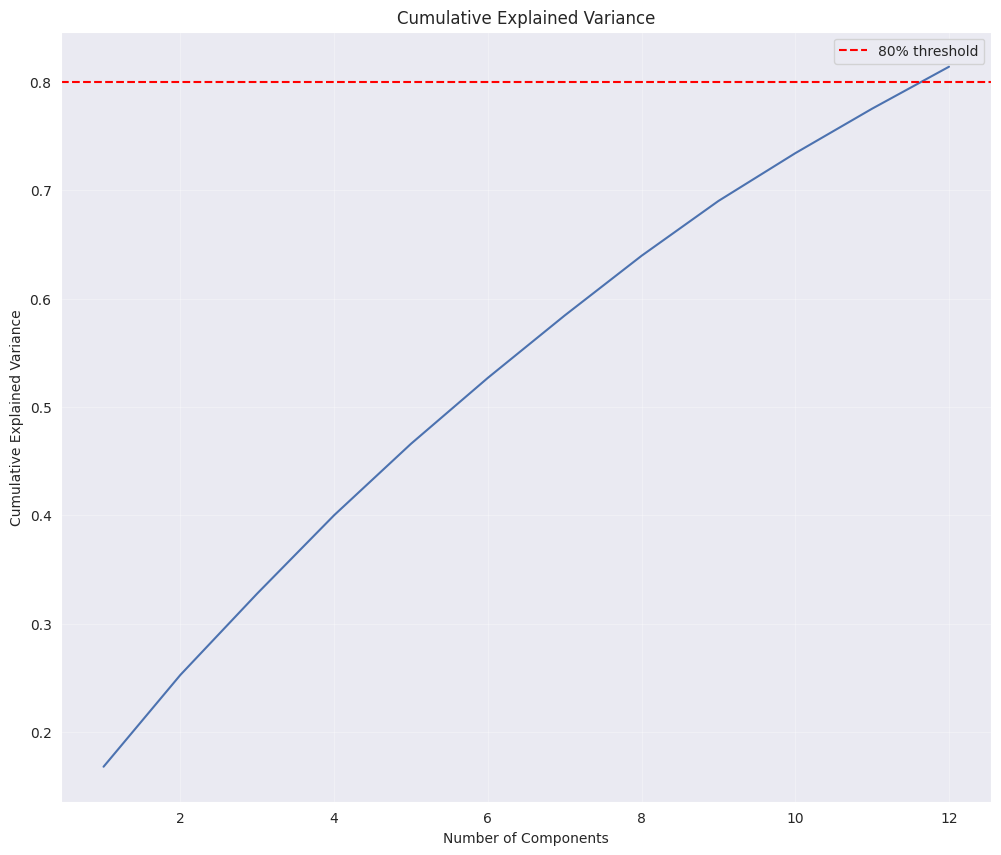

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [105]:
sns.scatterplot(data=d_pca,s=50)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 10))
plt.plot(range(1, len(cumsum) + 1), cumsum)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
plt.figure(figsize=(12, 10))